In [ ]:

#Step 1: LOAD THE DATA using Pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None) # Set display and style options
sns.set(style="whitegrid")# visual style of plots to white

file_path = '../data/netflix_titles.csv'#path of the dataset
df = pd.read_csv(file_path) #import the dataset using the pandas

print("Dataset Shape:", df.shape)# shape of the dataset
df.head() #show first five data

In [ ]:
# Check for null values
df.isnull().sum()

# Check data types
df.info()

# Strip leading/trailing whitespace from all string columns
df['date_added'] = df['date_added'].astype(str).str.strip()

# Now safely convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['date_added'].isnull().sum()

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Fill missing 'country' with "Unknown"
df['country'] = df['country'].fillna('Unknown')

C:\Users\hp\AppData\Local\Temp\ipykernel_2092\2661169048.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


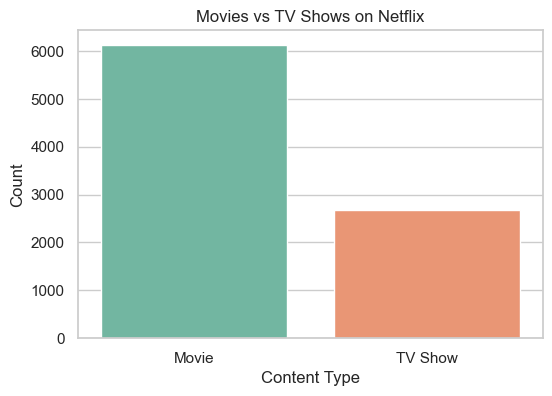

In [20]:
#1.Movies vs TV Shows Count
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/netflix_titles.csv')

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2092\11297517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='release_year', palette='coolwarm', order=sorted(df['release_year'].dropna().unique()))


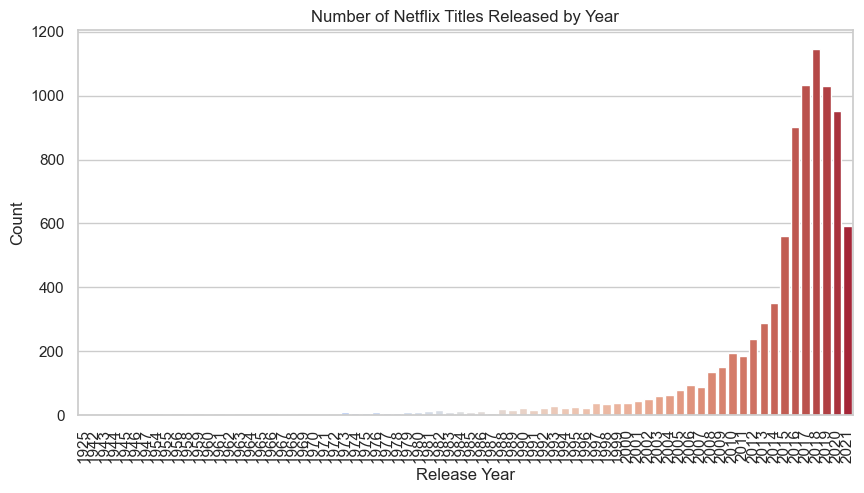

In [22]:
**##Content count over years by release year**
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='release_year', palette='coolwarm', order=sorted(df['release_year'].dropna().unique()))
plt.xticks(rotation=90)
plt.title('Number of Netflix Titles Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2092\2710969878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


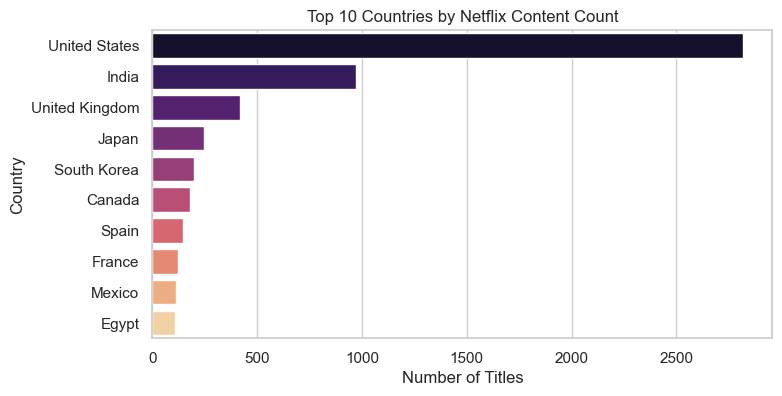

In [24]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries by Netflix Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2092\1756563830.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='coolwarm', order=sorted(df['year_added'].dropna().unique()))


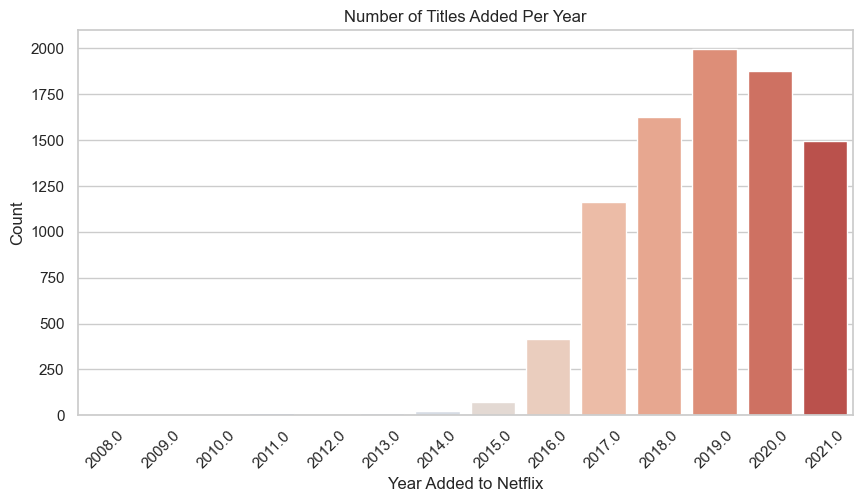

In [26]:
#2. Content Added Over the Years
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', palette='coolwarm', order=sorted(df['year_added'].dropna().unique()))
plt.xticks(rotation=45)
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Count')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2092\2026490370.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


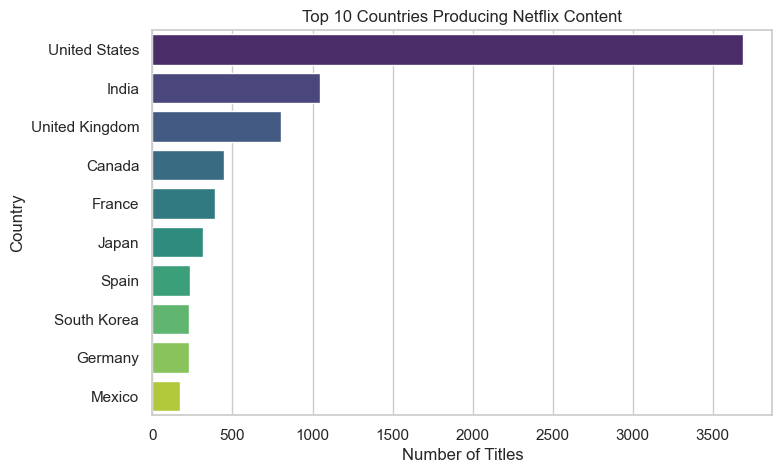

In [28]:
# 3.TOP 10 countries producing content
from collections import Counter

# Drop rows where country is missing
df_countries = df.dropna(subset=['country'])

# Split countries and flatten list
countries_list = df_countries['country'].str.split(', ').explode()

top_countries = countries_list.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2092\4049364072.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


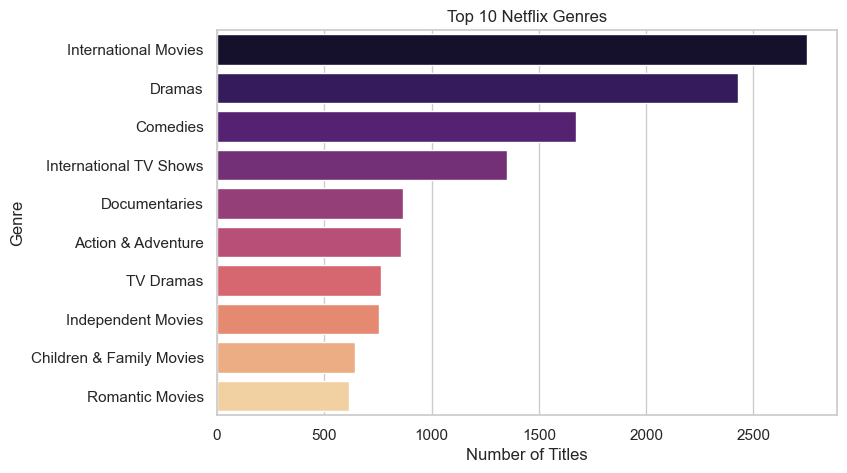

In [30]:
#4. Top Genres
df_genres = df.dropna(subset=['listed_in'])
genres_list = df_genres['listed_in'].str.split(', ').explode()
top_genres = genres_list.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

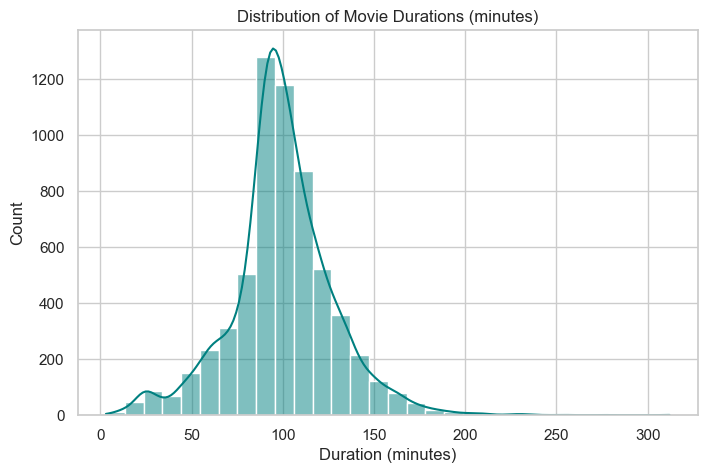

In [32]:
#5. Duration Distribution
# Extract duration as integer for movies
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_min'] = df_movies['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(8,5))
sns.histplot(df_movies['duration_min'].dropna(), bins=30, kde=True, color='teal')
plt.title('Distribution of Movie Durations (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_2092\282148983.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_shows['seasons'] = df_shows['duration'].str.extract('(\d+)').astype(float)
C:\Users\hp\AppData\Local\Temp\ipykernel_2092\282148983.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_shows, x='seasons', palette='pastel')


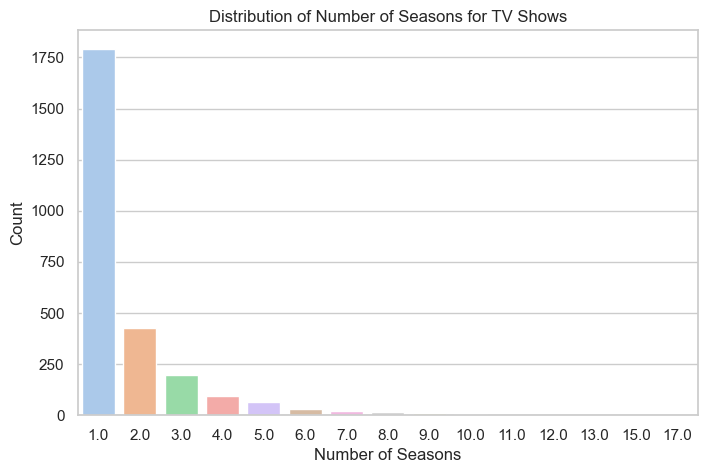

In [34]:
#For TV Shows, you can similarly plot season counts:
df_shows = df[df['type'] == 'TV Show'].copy()
df_shows['seasons'] = df_shows['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(8,5))
sns.countplot(data=df_shows, x='seasons', palette='pastel')
plt.title('Distribution of Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()